<a href="https://colab.research.google.com/github/SushilKokare/University_Project/blob/Models_On_New_Data/New__Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.xception import Xception
from matplotlib import pyplot as plt

In [ ]:

def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [ ]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/CT/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/CT/Test'
pathValidation = '/content/drive/MyDrive/AtiNeu Project/Data/CT/Validation'

In [ ]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)
  

Found 2456 images belonging to 2 classes.
Found 659 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [ ]:
base_model = Xception(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)


for layer in base_model.layers:
  layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(train_data,epochs=10,validation_data=test_data,
                    )

Epoch 1/10
77/77 [==============================] - 1612s 21s/step - loss: 2.7291 - accuracy: 0.6844 - val_loss: 0.4332 - val_accuracy: 0.8255
Epoch 2/10
77/77 [==============================] - 19s 248ms/step - loss: 0.3555 - accuracy: 0.8563 - val_loss: 0.1631 - val_accuracy: 0.9363
Epoch 3/10
77/77 [==============================] - 17s 223ms/step - loss: 0.1573 - accuracy: 0.9385 - val_loss: 0.1662 - val_accuracy: 0.9302
Epoch 4/10
77/77 [==============================] - 17s 225ms/step - loss: 0.1335 - accuracy: 0.9515 - val_loss: 0.0982 - val_accuracy: 0.9636
Epoch 5/10
77/77 [==============================] - 17s 222ms/step - loss: 0.0790 - accuracy: 0.9731 - val_loss: 0.0490 - val_accuracy: 0.9848
Epoch 6/10
77/77 [==============================] - 19s 247ms/step - loss: 0.0352 - accuracy: 0.9959 - val_loss: 0.0586 - val_accuracy: 0.9879
Epoch 7/10
77/77 [==============================] - 17s 221ms/step - loss: 0.0279 - accuracy: 0.9959 - val_loss: 0.0291 - val_accuracy: 0.9909

In [ ]:
model.save('/content/drive/MyDrive/AtiNeu Project/Data/CT/model99.h5')

In [ ]:

def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()
     

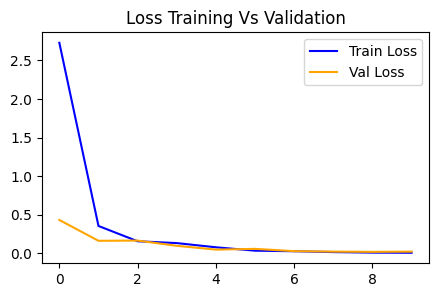

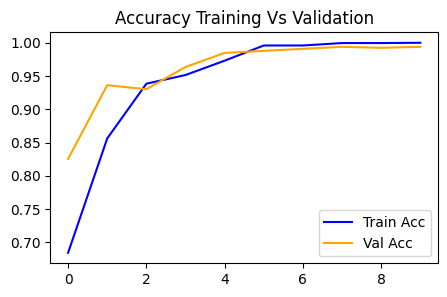

In [ ]:
show_result(history)


In [ ]:
pathVal = ''

In [ ]:
val_gen = ImageDataGenerator(rescale = 1./255)

val_data = val_gen.flow_from_directory(
    pathValidation,
    target_size = (225,225),
    # batch_size = batch_size,
    class_mode = 'binary'
) 


Found 235 images belonging to 2 classes.


In [ ]:
# '/content/drive/MyDrive/AtiNeu Project/Data/CT/model99.h5'

In [ ]:
import tensorflow

In [ ]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/AtiNeu Project/Data/CT/model99.h5')


In [ ]:
loss, accuracy = model.evaluate(val_data)  # Evaluate the model on validation data

8/8 [==============================] - 42s 6s/step - loss: 0.0148 - accuracy: 0.9957


In [ ]:
import tensorflow

In [ ]:
m =  tensorflow.keras.models.load_model('/content/drive/MyDrive/AtiNeu Project/Data/CT/model99.h5')

m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,552,105
Trainable params: 25,690,625
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
from keras.applications.xception import Xception

In [ ]:
xm = Xception(weights = 'imagenet' )
xm.summary()

91884032/91884032 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
x = Xception(weights='imagenet',include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
x.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

In [ ]:
for layer in x.layers:
  layer.trainable = False

In [ ]:
x.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        